In [1]:
import os

os.environ["KERAS_BACKEND"] = "jax"

import numpy as np
import matplotlib.pyplot as plt

import jax.numpy as jnp
import jax.random as jax_random
import pandas as pd

import keras
from keras import models
from keras import layers
from keras import losses
from keras import optimizers
from keras import metrics
from keras import ops

In [2]:
plt.set_loglevel("info")

In [3]:
print(f"Keras: {keras.__version__}")
print(f"Numpy: {np.__version__}")

Keras: 3.6.0
Numpy: 1.26.0


In [4]:
import torchvision
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader

to_numpy_array = lambda img: np.array(img, dtype=np.float32) / 255.0

mnist_data_train = torchvision.datasets.MNIST(
    "./data",
    train=True,
    download=True,
    transform=to_numpy_array,
)
mnist_data_test = torchvision.datasets.MNIST(
    "./data",
    train=False,
    download=True,
    transform=to_numpy_array,
)
x_example, y_example = mnist_data_train[0]

In [5]:
B = 32
mnist_train_loader = DataLoader(mnist_data_train, batch_size=B, shuffle=True)
mnist_test_loader = DataLoader(mnist_data_test, batch_size=B)

In [6]:
# How many values are in the input? We use this to help determine the size of subsequent layers
D = 28 * 28  # 28 * 28 images
# Hidden layer size
n = 256
# How many channels are in the input?
C = 1
# How many classes are there?
classes = 10
x_shape = (28, 28)

# Create our regular model
model_regular = models.Sequential(
    [
        layers.Input(shape=x_shape),
        layers.Flatten(),
        layers.Dense(n, activation="tanh"),
        layers.Dense(n, activation="tanh"),
        layers.Dense(n, activation="tanh"),
        layers.Dense(classes, activation="softmax"),
    ]
)

model_regular.compile(
    optimizer="SGD",
    loss=losses.SparseCategoricalCrossentropy(),
    metrics=[metrics.SparseCategoricalAccuracy()],
)
fc_results = model_regular.fit(
    mnist_train_loader, validation_data=mnist_test_loader, epochs=10
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.7699 - sparse_categorical_accuracy: 0.7936 - val_loss: 0.3024 - val_sparse_categorical_accuracy: 0.9155
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.3001 - sparse_categorical_accuracy: 0.9145 - val_loss: 0.2565 - val_sparse_categorical_accuracy: 0.9263
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2536 - sparse_categorical_accuracy: 0.9262 - val_loss: 0.2297 - val_sparse_categorical_accuracy: 0.9330
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2292 - sparse_categorical_accuracy: 0.9338 - val_loss: 0.1992 - val_sparse_categorical_accuracy: 0.9417
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1995 - sparse_categorical_accuracy: 0.9427 - val_loss: 0.1808 - val_sparse_categorical_accuracy: 0.9470
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1796 - sparse_categorical_accuracy: 0.9483 - val_loss: 0.1631 - val_sparse_categorical_accuracy:

In [7]:
# Create our regular model
h2_layer = layers.Dense(n, activation="tanh")
model_shared = models.Sequential(
    [
        layers.Input(shape=x_shape),
        layers.Flatten(),
        layers.Dense(n, activation="tanh"),
        h2_layer,
        h2_layer,
        layers.Dense(classes, activation="softmax"),
    ]
)

model_shared.compile(
    optimizer="SGD",
    loss=losses.SparseCategoricalCrossentropy(),
    metrics=[metrics.SparseCategoricalAccuracy()],
)
fc_shared_result = model_shared.fit(
    mnist_train_loader, validation_data=mnist_test_loader, epochs=10
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.7629 - sparse_categorical_accuracy: 0.8033 - val_loss: 0.2983 - val_sparse_categorical_accuracy: 0.9148
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2976 - sparse_categorical_accuracy: 0.9151 - val_loss: 0.2533 - val_sparse_categorical_accuracy: 0.9276
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2579 - sparse_categorical_accuracy: 0.9258 - val_loss: 0.2266 - val_sparse_categorical_accuracy: 0.9330
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2177 - sparse_categorical_accuracy: 0.9371 - val_loss: 0.2061 - val_sparse_categorical_accuracy: 0.9388
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1971 - sparse_categorical_accuracy: 0.9429 - val_loss: 0.1836 - val_sparse_categorical_accuracy: 0.9458
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1767 - sparse_categorical_accuracy: 0.9510 - val_loss: 0.1641 - val_sparse_categorical_accuracy:

<Axes: xlabel='epochs', ylabel='Accuracy'>

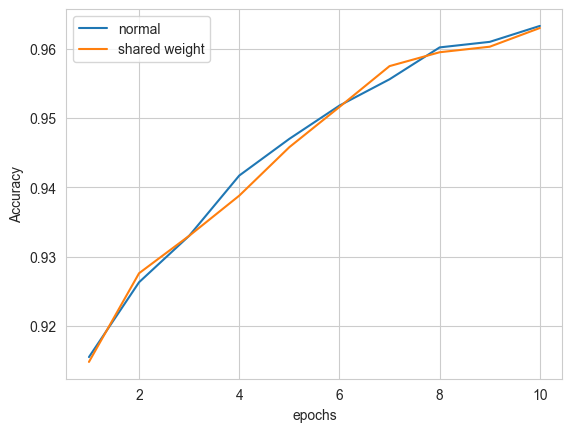

In [8]:
pd.DataFrame(
    {
        "epochs": np.arange(1, 11, 1),
        "normal": fc_results.history["val_sparse_categorical_accuracy"],
        "shared weight": fc_shared_result.history["val_sparse_categorical_accuracy"],
    }
).set_index("epochs").plot(ylabel="Accuracy")

In [9]:
zip_file_url = "https://download.pytorch.org/tutorial/data.zip"

import requests, zipfile, io

r = requests.get(zip_file_url)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

# Zip file is organized as data/names/[LANG].txt , where [LANG] is a specific language

In [10]:
namge_language_data = {}

# We will use some code to remove UNICODE tokens to make life easy for us processing wise
# e.g., convert something like "Ślusàrski" to Slusarski
import unicodedata
import string

all_letters = string.ascii_letters + " .,;'"
n_letters = len(all_letters)
alphabet = {}
for i in range(n_letters):
    alphabet[all_letters[i]] = i


# Turn a Unicode string to plain ASCII, thanks to https://stackoverflow.com/a/518232/2809427
def unicodeToAscii(s):
    return "".join(
        c
        for c in unicodedata.normalize("NFD", s)
        if unicodedata.category(c) != "Mn" and c in all_letters
    )


# Loop through every language, open the zip file entry, and read all the lines from the text file.
for zip_path in z.namelist():
    if "data/names/" in zip_path and zip_path.endswith(".txt"):
        lang = zip_path[len("data/names/") : -len(".txt")]
        with z.open(zip_path) as myfile:
            lang_names = [
                unicodeToAscii(line).lower()
                for line in str(myfile.read(), encoding="utf-8").strip().split("\n")
            ]
            namge_language_data[lang] = lang_names
        print(lang, ": ", len(lang_names))  # Print out the name of each language too.

Arabic :  2000
Chinese :  268
Czech :  519
Dutch :  297
English :  3668
French :  277
German :  724
Greek :  203
Irish :  232
Italian :  709
Japanese :  991
Korean :  94
Polish :  139
Portuguese :  74
Russian :  9408
Scottish :  100
Spanish :  298
Vietnamese :  73


In [11]:
class LanguageNameDataset(Dataset):

    def __init__(self, lang_name_dict, vocabulary):
        self.label_names = [x for x in lang_name_dict.keys()]
        self.data = []
        self.labels = []
        self.vocabulary = vocabulary
        for y, language in enumerate(self.label_names):
            for sample in lang_name_dict[language]:
                self.data.append(sample)
                self.labels.append(y)

    def __len__(self):
        return len(self.data)

    def string2InputVec(self, input_string):
        """
        This method will convert any input string into a vector of long values, according to the vocabulary used by this object.
        input_string: the string to convert to a tensor
        """
        T = len(input_string)  # How many characters long is the string?

        # Create a new tensor to store the result in
        name_vec = np.zeros((T), dtype=np.int64)
        # iterate through the string and place the appropriate values into the tensor
        for pos, character in enumerate(input_string):
            name_vec[pos] = self.vocabulary[character]

        return name_vec

    def __getitem__(self, idx):
        name = self.data[idx]
        label = self.labels[idx]

        # Conver the correct class label into a tensor for PyTorch
        label_vec = np.array([label], dtype=np.int64)

        return self.string2InputVec(name), label

In [12]:
import torch

dataset = LanguageNameDataset(namge_language_data, alphabet)

train_data, test_data = torch.utils.data.random_split(
    dataset, (len(dataset) - 300, 300)
)

train_loader = DataLoader(train_data, batch_size=1, shuffle=True)
test_loader = DataLoader(test_data, batch_size=1, shuffle=False)

In [13]:
for e in train_loader:
    print(e)
    break

[tensor([[ 7,  0,  8,  3, 20, 17, 14, 21]]), tensor([14])]


In [14]:
dataset[300]

(array([18,  0, 12,  0,  7,  0]), 0)

In [15]:
input_sequence = np.array([0, 1, 1, 0, 2], dtype=np.int64)
embeding_layer = layers.Embedding(3, 2)
x_seq = embeding_layer(input_sequence)
print(input_sequence.shape, x_seq.shape)

(5,) (5, 2)


In [16]:
D = 64
vocab_size = len(all_letters)
hidden_nodes = 256
classes = len(dataset.label_names)

In [17]:
input_sequence.shape

(5,)

In [18]:
first_rnn = models.Sequential(
    [
        layers.Input(shape=(12,)),
        layers.Embedding(vocab_size, D),
        layers.SimpleRNN(hidden_nodes),
        layers.Dense(classes, activation="softmax"),  # (B, D) -> (B, classes)
    ]
)

first_rnn.compile(
    optimizer="SGD",
    loss=losses.SparseCategoricalCrossentropy(),
    metrics=[metrics.SparseCategoricalAccuracy()],
)

In [19]:
[dataset[0][0].shape, dataset[1][0].shape]

[(6,), (5,)]

In [20]:
layers.Embedding(vocab_size, D)(dataset[0][0]).shape

(6, 64)

In [21]:
first_rnn_result = first_rnn.fit(
    train_loader, validation_data=test_loader, epochs=20, batch_size=16
)

Epoch 1/20
19774/19774 ━━━━━━━━━━━━━━━━━━━━ 17s 827us/step - loss: 1.3332 - sparse_categorical_accuracy: 0.6110 - val_loss: 0.9801 - val_sparse_categorical_accuracy: 0.7100
Epoch 2/20
19774/19774 ━━━━━━━━━━━━━━━━━━━━ 12s 575us/step - loss: 1.0032 - sparse_categorical_accuracy: 0.6956 - val_loss: 0.9710 - val_sparse_categorical_accuracy: 0.6933
Epoch 3/20
19774/19774 ━━━━━━━━━━━━━━━━━━━━ 12s 587us/step - loss: 0.8946 - sparse_categorical_accuracy: 0.7321 - val_loss: 0.8512 - val_sparse_categorical_accuracy: 0.7500
Epoch 4/20
19774/19774 ━━━━━━━━━━━━━━━━━━━━ 12s 613us/step - loss: 0.8258 - sparse_categorical_accuracy: 0.7484 - val_loss: 0.7622 - val_sparse_categorical_accuracy: 0.7533
Epoch 5/20
19774/19774 ━━━━━━━━━━━━━━━━━━━━ 11s 581us/step - loss: 0.7585 - sparse_categorical_accuracy: 0.7769 - val_loss: 0.8212 - val_sparse_categorical_accuracy: 0.7533
Epoch 6/20
19774/19774 ━━━━━━━━━━━━━━━━━━━━ 12s 600us/step - loss: 0.7629 - sparse_categorical_accuracy: 0.7708 - val_loss: 0.8260 - va

In [22]:
first_rnn.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 12, 64)         │         3,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ (None, 256)            │        82,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 18)             │         4,626 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 90,452 (353.33 KB)

 Trainable params: 90,450 (353.32 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (8.00 B)

<Axes: >

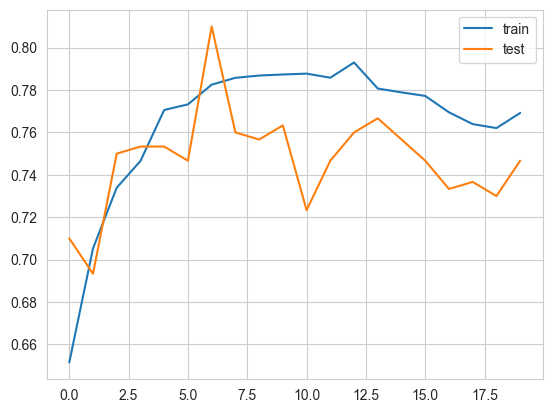

In [37]:
pd.DataFrame(
    {
        "train": first_rnn_result.history["sparse_categorical_accuracy"],
        "test": first_rnn_result.history["val_sparse_categorical_accuracy"],
    }
).plot()

In [24]:
rnn_3layer = models.Sequential(
    [
        layers.Input(shape=(12,)),
        layers.Embedding(vocab_size, D),
        layers.SimpleRNN(hidden_nodes, return_sequences=True),
        layers.SimpleRNN(hidden_nodes, return_sequences=True),
        layers.SimpleRNN(hidden_nodes),
        layers.Dense(classes, activation="softmax"),  # (B, D) -> (B, classes)
    ]
)

rnn_3layer.compile(
    optimizer="SGD",
    loss=losses.SparseCategoricalCrossentropy(),
    metrics=[metrics.SparseCategoricalAccuracy()],
)

In [25]:
rnn_3layer_result = rnn_3layer.fit(
    train_loader, validation_data=test_loader, epochs=20, batch_size=16
)

Epoch 1/20
19774/19774 ━━━━━━━━━━━━━━━━━━━━ 35s 2ms/step - loss: 1.5128 - sparse_categorical_accuracy: 0.5624 - val_loss: 1.1083 - val_sparse_categorical_accuracy: 0.6667
Epoch 2/20
19774/19774 ━━━━━━━━━━━━━━━━━━━━ 26s 1ms/step - loss: 1.0523 - sparse_categorical_accuracy: 0.6954 - val_loss: 0.9481 - val_sparse_categorical_accuracy: 0.7433
Epoch 3/20
19774/19774 ━━━━━━━━━━━━━━━━━━━━ 27s 1ms/step - loss: 0.9241 - sparse_categorical_accuracy: 0.7405 - val_loss: 0.8379 - val_sparse_categorical_accuracy: 0.7633
Epoch 4/20
19774/19774 ━━━━━━━━━━━━━━━━━━━━ 27s 1ms/step - loss: 0.8750 - sparse_categorical_accuracy: 0.7521 - val_loss: 0.9448 - val_sparse_categorical_accuracy: 0.7300
Epoch 5/20
19774/19774 ━━━━━━━━━━━━━━━━━━━━ 26s 1ms/step - loss: 0.7953 - sparse_categorical_accuracy: 0.7702 - val_loss: 0.9934 - val_sparse_categorical_accuracy: 0.7300
Epoch 6/20
19774/19774 ━━━━━━━━━━━━━━━━━━━━ 28s 1ms/step - loss: 0.7773 - sparse_categorical_accuracy: 0.7748 - val_loss: 0.8531 - val_sparse_cat

<Axes: >

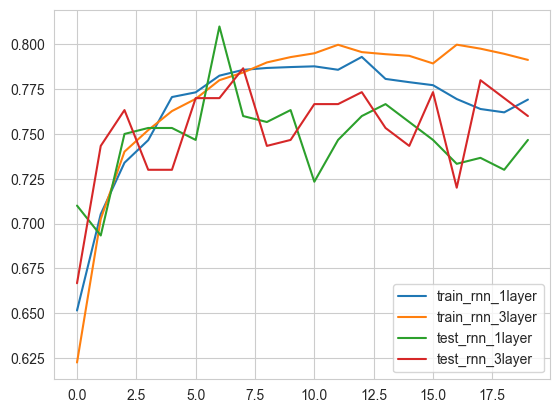

In [33]:
pd.DataFrame(
    {
        "train_rnn_1layer": first_rnn_result.history["sparse_categorical_accuracy"],
        "train_rnn_3layer": rnn_3layer_result.history["sparse_categorical_accuracy"],
        "test_rnn_1layer": first_rnn_result.history["val_sparse_categorical_accuracy"],
        "test_rnn_3layer": rnn_3layer_result.history["val_sparse_categorical_accuracy"],
    }
).plot()

In [27]:
rnn_bidirectional_3layer = models.Sequential(
    [
        layers.Embedding(vocab_size, D),
        layers.Bidirectional(layers.SimpleRNN(hidden_nodes, return_sequences=True)),
        layers.Bidirectional(layers.SimpleRNN(hidden_nodes, return_sequences=True)),
        layers.Bidirectional(layers.SimpleRNN(hidden_nodes)),
        layers.Dense(classes, activation="softmax"),  # (B, D) -> (B, classes)
    ]
)

rnn_bidirectional_3layer.compile(
    optimizer="SGD",
    loss=losses.SparseCategoricalCrossentropy(),
    metrics=[metrics.SparseCategoricalAccuracy()],
)

In [28]:
rnn_bidirectional_3layer_result = rnn_bidirectional_3layer.fit(
    train_loader, validation_data=test_loader, epochs=20, batch_size=16
)

Epoch 1/20
19774/19774 ━━━━━━━━━━━━━━━━━━━━ 75s 4ms/step - loss: 1.5427 - sparse_categorical_accuracy: 0.5879 - val_loss: 1.2026 - val_sparse_categorical_accuracy: 0.6933
Epoch 2/20
19774/19774 ━━━━━━━━━━━━━━━━━━━━ 62s 3ms/step - loss: 1.2885 - sparse_categorical_accuracy: 0.6824 - val_loss: 1.0920 - val_sparse_categorical_accuracy: 0.7067
Epoch 3/20
19774/19774 ━━━━━━━━━━━━━━━━━━━━ 61s 3ms/step - loss: 1.1976 - sparse_categorical_accuracy: 0.7186 - val_loss: 1.1396 - val_sparse_categorical_accuracy: 0.7233
Epoch 4/20
19774/19774 ━━━━━━━━━━━━━━━━━━━━ 60s 3ms/step - loss: 1.1513 - sparse_categorical_accuracy: 0.7368 - val_loss: 1.0314 - val_sparse_categorical_accuracy: 0.7467
Epoch 5/20
19774/19774 ━━━━━━━━━━━━━━━━━━━━ 62s 3ms/step - loss: 1.0873 - sparse_categorical_accuracy: 0.7567 - val_loss: 1.2012 - val_sparse_categorical_accuracy: 0.7067
Epoch 6/20
19774/19774 ━━━━━━━━━━━━━━━━━━━━ 69s 3ms/step - loss: 1.0560 - sparse_categorical_accuracy: 0.7638 - val_loss: 1.2008 - val_sparse_cat

<Axes: >

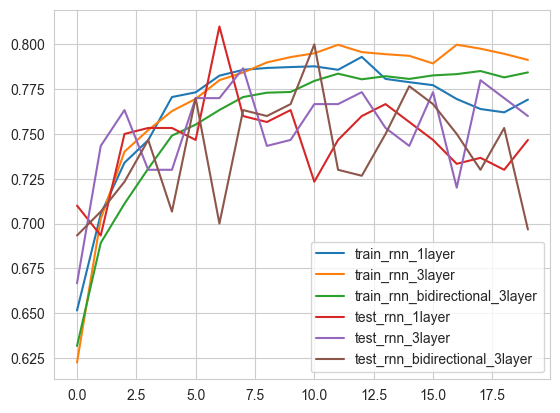

In [34]:
pd.DataFrame(
    {
        "train_rnn_1layer": first_rnn_result.history["sparse_categorical_accuracy"],
        "train_rnn_3layer": rnn_3layer_result.history["sparse_categorical_accuracy"],
        "train_rnn_bidirectional_3layer": rnn_bidirectional_3layer_result.history[
            "sparse_categorical_accuracy"],
        "test_rnn_1layer": first_rnn_result.history["val_sparse_categorical_accuracy"],
        "test_rnn_3layer": rnn_3layer_result.history["val_sparse_categorical_accuracy"],
        "test_rnn_bidirectional_3layer": rnn_bidirectional_3layer_result.history[
            "val_sparse_categorical_accuracy"
        ],
    }
).plot()